### Import python modules

In [ ]:
import itertools
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import RobustScaler

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

from IPython.display import Image

from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data as pandas dataframe

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

data_df = pd.read_csv("/content/drive/My Drive/DS340W/fraud_email_.csv")

Mounted at /content/drive


In [ ]:
data_df = data_df.dropna()

data_df['Text'] = data_df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_df['Text'] = data_df['Text'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
data_df['Text'] = data_df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data_df['Text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


print(X.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


(11928, 130424)


In [ ]:
data_df = data_df.dropna()

stopset = set(stopwords.words("english"))
vectorizer = TfidfVectorizer(stop_words = stopset, norm='l2', decode_error='ignore',binary=True)
features = vectorizer.fit_transform(data_df["Text"])


print(features.shape[:])

train_X, test_X, train_y, test_y = train_test_split(X, data_df["Class"], test_size=0.5, stratify=data_df["Class"])

(11928, 130424)


## Exploratory Data Analysis


In [ ]:
data_df.head()

,Text,Class
0,supply quality chinas exclusive dimensions unb...,1
1,sidlet know thx,0
2,dear friendgreetings youi wish accost request ...,1
3,mr cheung puihang seng bank ltddes voeux rd br...,1
4,surprising assessment embassy,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11928 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11928 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.6+ KB


In [ ]:
data_df.describe()

,Class
count,11928.000000
mean,0.434775
std,0.495748
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Decision Trees


In [ ]:
max_depth = 15
tree_auc_train, tree_auc_test = np.zeros(max_depth), np.zeros(max_depth)
training_time, prediction_time = np.zeros(max_depth), np.zeros(max_depth)
for i in range(1,max_depth):
    clf_decision_tree = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy',random_state=1)
    t0=time.clock()
    clf_decision_tree = clf_decision_tree.fit(train_X, train_y)
    training_time[i] = round(time.clock()-t0, 3)
    tree_auc_train[i] = roc_auc_score(train_y, clf_decision_tree.predict_proba(train_X)[:,1])
    t1=time.clock()
    tree_auc_test[i] = roc_auc_score(test_y, clf_decision_tree.predict_proba(test_X)[:,1])
    prediction_time[i] = round(time.clock()-t1, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykern

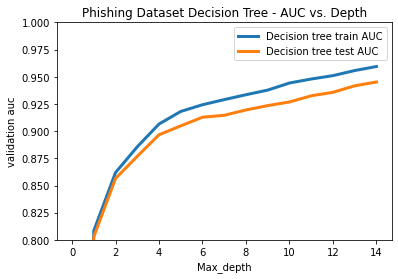

<Figure size 1152x576 with 0 Axes>

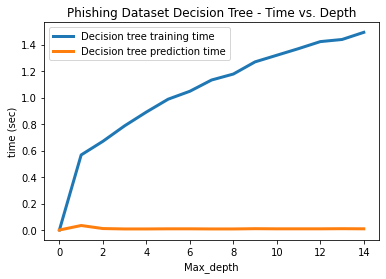

<Figure size 1152x576 with 0 Axes>

In [ ]:
from matplotlib import pyplot
pyplot.plot(tree_auc_train, linewidth=3, label = "Decision tree train AUC")
pyplot.plot(tree_auc_test, linewidth=3, label = "Decision tree test AUC")
pyplot.legend()
pyplot.ylim(0.8, 1.0)
pyplot.title("Phishing Dataset Decision Tree - AUC vs. Depth")
pyplot.xlabel("Max_depth")
pyplot.ylabel("validation auc")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_treedepth_fig2')
pyplot.show()

pyplot.plot(training_time, linewidth=3, label = "Decision tree training time")
pyplot.plot(prediction_time, linewidth=3, label = "Decision tree prediction time")
pyplot.legend()
pyplot.xlabel("Max_depth")
pyplot.ylabel("time (sec)")
pyplot.title("Phishing Dataset Decision Tree - Time vs. Depth")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_treedepth_time_fig2')
pyplot.show()

In [ ]:
print("Best tree depth training: " + str(np.argmax(tree_auc_train, axis=0)))
print("Highest AUC score training: " + str(np.max(tree_auc_train, axis=0)))
print("Best tree depth testing: " + str(np.argmax(tree_auc_test, axis=0)))
print("Highest AUC score testing: " +  str(np.max(tree_auc_test, axis=0)))

Best tree depth training: 14
Highest AUC score training: 0.9594643200557189
Best tree depth testing: 14
Highest AUC score testing: 0.9452451280476621


### Decision tree pruning


In [ ]:
from sklearn.tree._tree import TREE_LEAF

def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:     
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and 
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        print("Pruned {}".format(index))

def prune_duplicate_leaves(mdl):
    # Remove leaves if both 
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() # Decision for each node
    prune_index(mdl.tree_, decisions)

# plot_tree(clf, features)
# tree.export_graphviz(clf,out_file='tree.dot',class_names=['No','Yes'],feature_names=features, 
#                      filled=True, rounded=True, special_characters=True, proportion=True)
# os.system("dot -Tpng tree.dot -o tree.png")
# os.system("tree.png")
# # Note : Uncoverted Quotes (Yes) and Converted quotes (No)
# Image(filename='tree.png')


clf_decision_tree = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy',random_state=1)
clf_decision_tree = clf_decision_tree.fit(train_X, train_y)
prune_duplicate_leaves(clf_decision_tree)
    
tree_auc_train_pruned = roc_auc_score(train_y, clf_decision_tree.predict_proba(train_X)[:,1])
tree_auc_test_pruned = roc_auc_score(test_y, clf_decision_tree.predict_proba(test_X)[:,1])

print("pruned decision tree training: " + str(tree_auc_train_pruned))
print("pruned decision tree testing: " + str(tree_auc_test_pruned))

# plot_tree(clf, features)
# tree.export_graphviz(clf,out_file='tree_pruned.dot',class_names=['No','Yes'],feature_names=features, 
#                          filled=True, rounded=True, special_characters=True, proportion=True)
# os.system("dot -Tpng tree_pruned.dot -o tree_pruned.png")
# os.system("tree_pruned.png")
# # Note : Uncoverted Quotes (Yes) and Converted quotes (No)
# Image(filename='tree_pruned.png')


Pruned 13
Pruned 12
Pruned 18
pruned decision tree training: 0.9512754428753771
pruned decision tree testing: 0.9378885352172971


OK


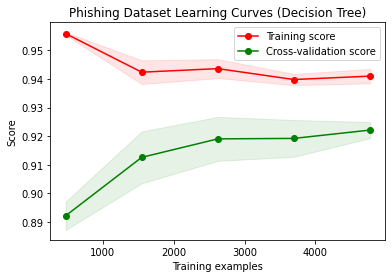

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt
  
print("OK")


X, y = train_X, train_y

title = "Phishing Dataset Learning Curves (Decision Tree)"
estimator = tree.DecisionTreeClassifier(max_depth=9, criterion='entropy',random_state=1)
plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1)

plt.show()

## Boosting


In [ ]:
max_depth = 15
adaboost_auc_train, adaboost_auc_test = np.zeros(max_depth), np.zeros(max_depth)
training_time, prediction_time = np.zeros(max_depth), np.zeros(max_depth)
for i in range(1,max_depth):
    clf_adaboost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i,criterion='entropy'), n_estimators=10, random_state=1)
    t0 = time.clock()
    clf_adaboost = clf_adaboost.fit(train_X, train_y)
    training_time[i] = round(time.clock()-t0, 3)
    adaboost_auc_train[i] = roc_auc_score(train_y, clf_adaboost.predict_proba(train_X)[:,1])
    t1 = time.clock()
    adaboost_auc_test[i] = roc_auc_score(test_y, clf_adaboost.predict_proba(test_X)[:,1])
    prediction_time[i] = round(time.clock()-t1, 3)
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykern

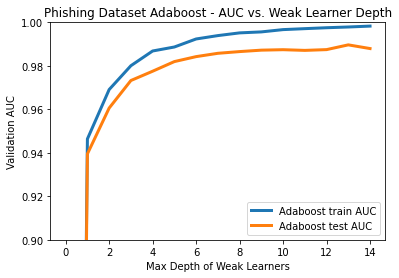

<Figure size 1152x576 with 0 Axes>

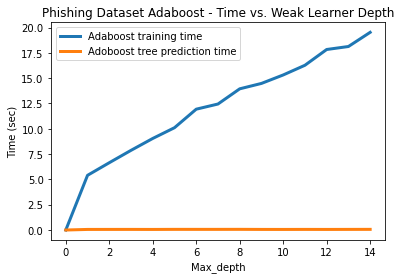

<Figure size 1152x576 with 0 Axes>

Best weak learner tree depth training: 14
Highest AUC score training: 0.998281261315206
Best weak learner tree depth testing: 13
Highest AUC score testing: 0.9896497003833542


In [ ]:
pyplot.plot(adaboost_auc_train, linewidth=3, label = "Adaboost train AUC")
pyplot.plot(adaboost_auc_test, linewidth=3, label = "Adaboost test AUC")
pyplot.legend()
pyplot.ylim(0.9, 1.0)
pyplot.xlabel("Max Depth of Weak Learners")
pyplot.ylabel("Validation AUC")
plt.title("Phishing Dataset Adaboost - AUC vs. Weak Learner Depth")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_boosting_fig4')
pyplot.show()

pyplot.plot(training_time, linewidth=3, label = "Adaboost training time")
pyplot.plot(prediction_time, linewidth=3, label = "Adoboost tree prediction time")
pyplot.title("Phishing Dataset Adaboost - Time vs. Weak Learner Depth")
pyplot.legend()
pyplot.xlabel("Max_depth")
pyplot.ylabel("Time (sec)")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_boosting_time_fig2')
pyplot.show()

print("Best weak learner tree depth training: " + str(np.argmax(adaboost_auc_train, axis=0)))
print("Highest AUC score training: " + str(np.max(adaboost_auc_train, axis=0)))
print("Best weak learner tree depth testing: " + str(np.argmax(adaboost_auc_test, axis=0)))
print("Highest AUC score testing: " +  str(np.max(adaboost_auc_test, axis=0)))

OK


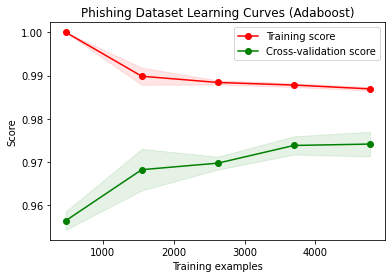

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
print("OK")


title = "Phishing Dataset Learning Curves (Adaboost)"
estimator = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy', random_state=1), n_estimators=10,random_state=1)
plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1)

plt.show()

## Neural Networks


In [ ]:
learning_rate = [0.1, 1, 2,3]
training_time, prediction_time = [],[]
nn_auc_train, nn_auc_test = [],[]
for rate in learning_rate:
    clf_nn = MLPClassifier(learning_rate_init=rate, random_state=1)
    t0 = time.clock()
    clf_nn = clf_nn.fit(train_X, train_y)
    training_time.append(round(time.clock()-t0, 3))
    nn_auc_train.append(roc_auc_score(train_y, clf_nn.predict_proba(train_X)[:,1]))
    t1 = time.clock()
    nn_auc_test.append(roc_auc_score(test_y, clf_nn.predict_proba(test_X)[:,1]))
    prediction_time.append(round(time.clock()-t1, 3))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykern

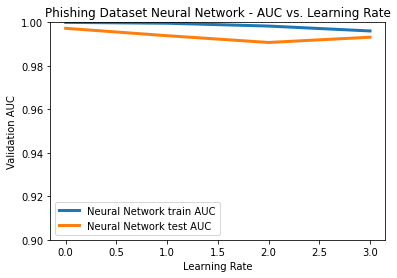

<Figure size 1152x576 with 0 Axes>

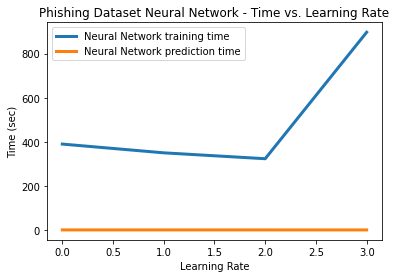

<Figure size 1152x576 with 0 Axes>

Best earning rate training: 0
Highest AUC score training: 0.9999930213958285
Best learning rate testing: 0
Highest AUC score testing: 0.9972627855178633


In [ ]:
pyplot.plot(nn_auc_train, linewidth=3, label = "Neural Network train AUC")
pyplot.plot(nn_auc_test, linewidth=3, label = "Neural Network test AUC")
pyplot.legend()
pyplot.ylim(0.9, 1.0)
pyplot.xlabel("Learning Rate")
pyplot.ylabel("Validation AUC")
plt.title("Phishing Dataset Neural Network - AUC vs. Learning Rate")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_neural_network_fig')
pyplot.show()

pyplot.plot(training_time, linewidth=3, label = "Neural Network training time")
pyplot.plot(prediction_time, linewidth=3, label = "Neural Network prediction time")
pyplot.legend()
pyplot.xlabel("Learning Rate")
pyplot.ylabel("Time (sec)")
pyplot.title("Phishing Dataset Neural Network - Time vs. Learning Rate")
pyplot.figure(figsize=(16,8))
pyplot.savefig('Phishing_nn_time_fig')
pyplot.show()

print("Best earning rate training: " + str(np.argmax(nn_auc_train, axis=0)))
print("Highest AUC score training: " + str(np.max(nn_auc_train, axis=0)))
print("Best learning rate testing: " + str(np.argmax(nn_auc_test, axis=0)))
print("Highest AUC score testing: " +  str(np.max(nn_auc_test, axis=0)))

OK


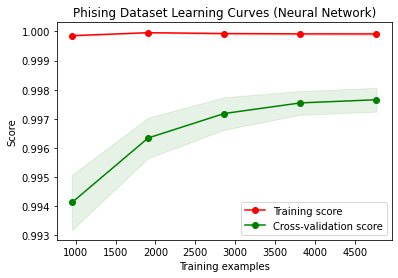

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.2, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, exploit_incremental_learning=True, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
print("OK")


title = "Phising Dataset Learning Curves (Neural Network)"
estimator = MLPClassifier(learning_rate_init=0.1, random_state=1)
cv = StratifiedKFold(n_splits=3,random_state=1, shuffle=True)
plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1)

plt.show()

## k-Nearest Neighbors


In [ ]:
max_k = 5
knn_auc_train, knn_auc_test = np.zeros(max_k), np.zeros(max_k)
training_time, prediction_time = np.zeros(max_k), np.zeros(max_k)
for i in range(1,max_k):
    clf_knn = KNeighborsClassifier(n_neighbors=i, algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, p=2, weights='uniform')
    t0 = time.clock()
    clf_knn = clf_knn.fit(train_X, train_y)
    training_time[i] = round(time.clock()-t0, 3)
    pred_train = clf_knn.predict_proba(train_X)[:,1]
    t1 = time.clock()
    pred_test = clf_knn.predict_proba(test_X)[:,1]
    prediction_time[i] = round(time.clock()-t1, 3)
    knn_auc_train[i] = roc_auc_score(train_y, pred_train)
    knn_auc_test[i] = roc_auc_score(test_y, pred_test)




    
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
/usr/local/l

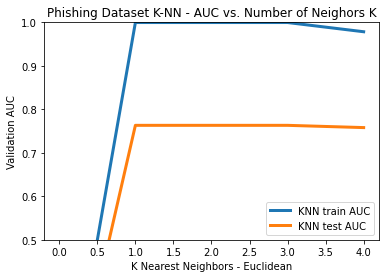

<Figure size 1152x576 with 0 Axes>

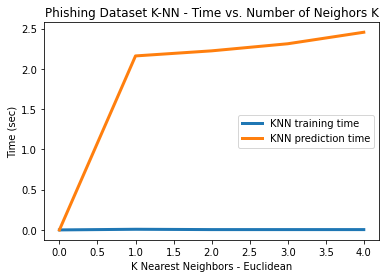

<Figure size 864x864 with 0 Axes>

Best number of neighbors training: 1
Highest AUC score training: 0.9996143463170073
Best number of neighbors testing: 1
Highest AUC score testing: 0.763208638642499


In [ ]:
pyplot.plot(knn_auc_train, linewidth=3, label = "KNN train AUC")
pyplot.plot(knn_auc_test, linewidth=3, label = "KNN test AUC")
pyplot.legend()
pyplot.ylim(0.5, 1.0)
pyplot.xlabel("K Nearest Neighbors - Euclidean")
pyplot.ylabel("Validation AUC")
pyplot.title("Phishing Dataset K-NN - AUC vs. Number of Neighors K")
pyplot.figure(figsize=(16,8))
pyplot.savefig('churn_knn_fig6')
pyplot.show()

pyplot.plot(training_time, linewidth=3, label = "KNN training time")
pyplot.plot(prediction_time, linewidth=3, label = "KNN prediction time")
pyplot.legend()
pyplot.xlabel("K Nearest Neighbors - Euclidean")
pyplot.ylabel("Time (sec)")
pyplot.title("Phishing Dataset K-NN - Time vs. Number of Neighors K")
pyplot.figure(figsize=(12,12))
pyplot.savefig('Phishing_Knn_time_fig')
pyplot.show()

print("Best number of neighbors training: " + str(np.argmax(knn_auc_train, axis=0)))
print("Highest AUC score training: " + str(np.max(knn_auc_train, axis=0)))
print("Best number of neighbors testing: " + str(np.argmax(knn_auc_test, axis=0)))
print("Highest AUC score testing: " +  str(np.max(knn_auc_test, axis=0)))

OK


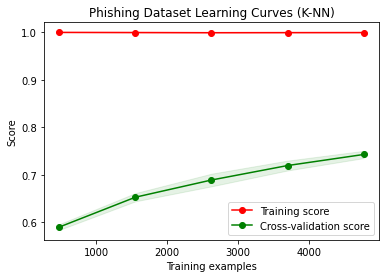

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
print("OK")


title = "Phishing Dataset Learning Curves (K-NN)"
estimator = KNeighborsClassifier(n_neighbors=1, algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, p=2, weights='uniform')
plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1)
plt.show()

## Support Vector Machines (SVM)

In [ ]:
clf_svm_linear = SVC(kernel='linear',probability=True, random_state=1)
t0 = time.clock()
clf_svm_linear.fit(train_X, train_y)
training_time_linear = round(time.clock()-t0, 3)
pred_train_linear = clf_svm_linear.predict_proba(train_X)[:,1]
t1 = time.clock()
pred_test_linear = clf_svm_linear.predict_proba(test_X)[:,1]
prediction_time_linear = round(time.clock()-t1, 3)
svm_auc_train_linear = roc_auc_score(train_y, pred_train_linear)
svm_auc_test_linear = roc_auc_score(test_y, pred_test_linear)

clf_svm_rbf = SVC(kernel='poly',probability=True, random_state=1)
t0 = time.clock()
clf_svm_rbf.fit(train_X, train_y)
training_time_rbf = round(time.clock() - t0, 3)
pred_train_rbf = clf_svm_rbf.predict_proba(train_X)[:,1]
t1= time.clock()
pred_test_rbf = clf_svm_rbf.predict_proba(test_X)[:,1]
prediction_time_rbf = round(time.clock() - t1, 3)
svm_auc_train_rbf = roc_auc_score(train_y, pred_train_rbf)
svm_auc_test_rbf = roc_auc_score(test_y, pred_test_rbf)

print("Linear kernel training AUC: " + str(svm_auc_train_linear))
print("Linear kernel testing AUC: " + str(svm_auc_test_linear))
print("Poly kernel training AUC: " + str(svm_auc_train_rbf))
print("Poly kernel testing AUC: " + str(svm_auc_test_rbf))

print("Linear kernel training time: " + str(training_time_linear))
print("Linear kernel prediction tim: " + str(prediction_time_linear))
print("Poly kernel training time: " + str(training_time_rbf))
print("Poly kernel prediction tim: " + str(prediction_time_rbf))
                             


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning

Linear kernel training AUC: 0.9999907333288869
Linear kernel testing AUC: 0.9981144040334958
Poly kernel training AUC: 0.9999930213958284
Poly kernel testing AUC: 0.9984308436915077
Linear kernel training time: 26.133
Linear kernel prediction tim: 4.298
Poly kernel training time: 94.993
Poly kernel prediction tim: 17.371


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


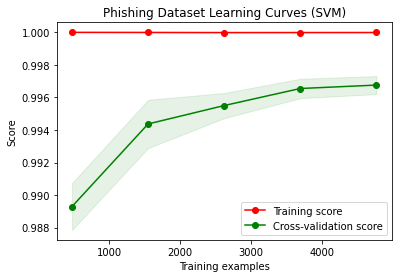

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Phishing Dataset Learning Curves (SVM)"
estimator = SVC(kernel='linear',probability=True, random_state=1)
plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1)

plt.show()


# Phishing URL Detection

In [ ]:
url_df = pd.read_csv("/content/drive/My Drive/DS340W/phishing_urls.csv")

In [ ]:
url_df.replace({'good':0, 'bad':1}, inplace=True)


In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

In [ ]:
X = url_df[['URL']].copy()
y = url_df.Label.copy()

In [ ]:
def prepare_data(X) :
    X['text_tokenized'] = X.URL.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features
X, features = prepare_data(X)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()

In [ ]:
def train_test_model(model, X, y, training_percentage) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    precision = precision_score(testY, predY, pos_label=1)
    recall = recall_score(testY, predY, pos_label=1)
    return accuracy, precision, recall  

In [ ]:
training_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
def model_results(model) :
    results = []
    for p in training_sizes :
        results.append(train_test_model(model, features, y, p))
    return pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall'])

In [ ]:
logreg_results = model_results(logreg)
#knn_results = model_results(knn)
#dtree_results = model_results(dtree)
#rfc_results = model_results(rfc)
#svc_results = model_results(svc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
models = ['Logistic Regression']
model_results = [logreg_results]

In [ ]:
accuracies = []
precisions = []
recalls = []
for model in model_results :
    accuracies.append(model.Accuracy.values)
    precisions.append(model.Precision.values)
    recalls.append(model.Recall.values)

In [ ]:
accuracies = pd.DataFrame(np.transpose(accuracies), columns=models, index=training_sizes*100)
precisions = pd.DataFrame(np.transpose(precisions), columns=models, index=training_sizes*100)
recalls = pd.DataFrame(np.transpose(recalls), columns=models, index=training_sizes*100)

accuracies
precisions
recalls

,Logistic Regression
10.0,0.835744
20.0,0.861992
30.0,0.877201
40.0,0.887207
50.0,0.891588
60.0,0.896466
70.0,0.902189
80.0,0.907112
90.0,0.913950


Novelty: Detection of fake phone numbers

In [ ]:
phishingPhone = pd.read_csv("/content/drive/My Drive/DS340W/phishingPhone.csv")


In [ ]:
X=np.array(phishingPhone[["phoneNum"]])
Y=np.array(phishingPhone["Label"])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [ ]:
model=LogisticRegression(C=0.01,solver='liblinear')
model.fit(x_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(X,Y)

0.5